In [9]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [10]:
train  = pd.read_csv('C:/Users/rp21108/Downloads/train_E6oV3lV.csv')

In [11]:
combi = train

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [13]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [14]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

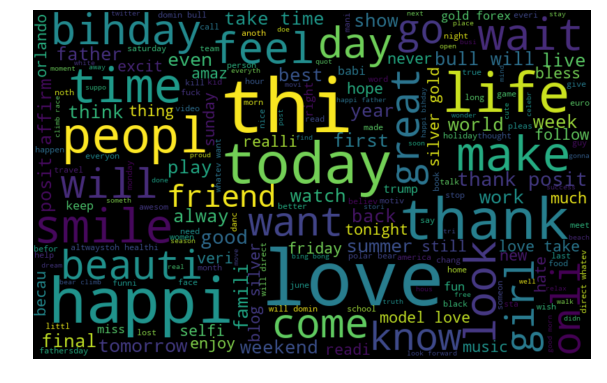

In [31]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

fig=plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
fig.savefig("test1234.png")

In [34]:
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import base64
def fig_to_uri(in_fig, close_all=True, **save_args):
    # type: (plt.Figure) -> str
    """
    Save a figure as a URI
    :param in_fig:
    :return:
    """
    out_img = BytesIO()
    in_fig.savefig(out_img, format='png', **save_args)
    if close_all:
        in_fig.clf()
        plt.close('all')
    out_img.seek(0)  # rewind file
    encoded = base64.b64encode(out_img.read()).decode("ascii").replace("\n", "")
    return "data:image/png;base64,{}".format(encoded)
app = dash.Dash()
app.layout = html.Div([
html.Div(id="html-div",children=[dcc.Graph(id="sunburst",figure=go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4],
)))]),
    html.Div([html.Img(id = 'cur_plot', src = '')],
             id='plot_div')
])
@app.callback(
Output('cur_plot', 'src'),
[Input('html-div', 'n_clicks'),Input('sunburst', 'clickData')],
[State('sunburst', 'hoverData')])
def value(clicks,cd,hd):
    fig=plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    out_url = fig_to_uri(fig)
    return out_url
    
    
if __name__ == '__main__':
    app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Dec/2019 20:30:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2019 20:30:15] "GET /_dash-component-suites/dash_renderer/react@16.8.6.min.js?v=1.0.0&m=1561062262 HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2019 20:30:15] "GET /_dash-component-suites/dash_renderer/prop-types@15.7.2.min.js?v=1.0.0&m=1561062262 HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2019 20:30:15] "GET /_dash-component-suites/dash_renderer/react-dom@16.8.6.min.js?v=1.0.0&m=1561062262 HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2019 20:30:15] "GET /_dash-component-suites/dash_html_components/dash_html_components.min.js?v=1.0.0&m=1561063963 HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2019 20:30:15] "GET /_dash-component-suites/dash_core_components/highlight.pack.js?v=1.0.0&m=1563307603 HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2019 20:30:15] "GET /_dash-component-suites/dash_renderer/dash_renderer.min.js?v=1.0.0&m=1561062262 HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2019 2

In [3]:
from sumy.parsers.plaintext import PlaintextParser

#for tokenization
from sumy.nlp.tokenizers import Tokenizer

In [2]:
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

In [7]:
str_="Paclitaxel is used as an antiproliferative agent for the prevention of restenosis (recurrent narrowing) of coronary and peripheral stents; locally delivered to the wall of the artery, a paclitaxel coating limits the growth of neointima (scar tissue) within stents.[18] Paclitaxel drug-eluting stents for coronary artery placement are sold under the trade name Taxus by Boston Scientific in the United States. Paclitaxel drug-eluting stents for femoropopliteal artery placement are also available."
parser=PlaintextParser.from_string(str_,Tokenizer("english"))

In [8]:
from sumy.summarizers.lex_rank import LexRankSummarizer 
summarizer = LexRankSummarizer()
#Summarize the document with 2 sentences
summary = summarizer(parser.document, 2) 
for sentence in summary:
    print(sentence)

Paclitaxel is used as an antiproliferative agent for the prevention of restenosis (recurrent narrowing) of coronary and peripheral stents; locally delivered to the wall of the artery, a paclitaxel coating limits the growth of neointima (scar tissue) within stents.
[18] Paclitaxel drug-eluting stents for coronary artery placement are sold under the trade name Taxus by Boston Scientific in the United States.
